In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

uploaded = files.upload()

Saving athlete_events.csv to athlete_events.csv


1. Загрузите данные из файла «athlete_events.csv» о спортсменах – участниках
олимпийских игр.

In [ ]:
df = pd.read_csv('athlete_events.csv')
print(df)

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

2. Определите количество значений каждого из признаков в загруженных
данных. По каким значениям имеются не все данные? По какому
значению отсутствующих данных больше всего?
Подсказка:
воспользуйтесь функцией count или info.

In [ ]:
counts = df.count()
print(counts)

ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64


Определим по каким есть не все данные

In [ ]:
N = len(df)
countsNaN = counts[counts < N]
print(countsNaN)

Age       261642
Height    210945
Weight    208241
Medal      39783
dtype: int64


Признак по которому данных меньше всего

In [ ]:
min_column = counts.idxmin()
print(min_column)

Medal


3. Выведите статистическую информацию
(среднее значение,
стандартное отклонение, минимальное и максимальное значение,
значение квартилей) по полям: возраст, рост, вес. Подсказка:
воспользуйтесь функцией describe.

In [ ]:
statistics = df[['Age', 'Height', 'Weight']].describe()
print(statistics)

                 Age         Height         Weight
count  261642.000000  210945.000000  208241.000000
mean       25.556898     175.338970      70.702393
std         6.393561      10.518462      14.348020
min        10.000000     127.000000      25.000000
25%        21.000000     168.000000      60.000000
50%        24.000000     175.000000      70.000000
75%        28.000000     183.000000      79.000000
max        97.000000     226.000000     214.000000


4. Ответьте на вопросы, написав соответствующий код

Сколько лет было самому молодому участнику олимпийских игр в
1992 году? Как звали этого участника и в какой дисциплине он(а)
участвовал(а)?

In [ ]:
only_1992 = df[df['Year']==1992]
min_age_index = only_1992['Age'].idxmin()
youngest_athlete = only_1992.loc[min_age_index]
print(youngest_athlete[['Age', 'Name', 'Sport', 'Year']])

Age                                 11.0
Name     Carlos Bienvenido Front Barrera
Sport                             Rowing
Year                                1992
Name: 73461, dtype: object


Выведите список всех видов спорта, которые когда-либо входили в
программу олимпийских игр. Каждый вид спорта должен
присутствовать в списке один раз.

In [ ]:
sports = df['Sport'].unique()
print(sports)

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


Каков средний рост теннисисток (пол – женский, вид спорта –
большой теннис), участвовавших в играх 2000 года?

In [ ]:
tennis_women = df[(df['Sex'] == 'F') & (df['Sport'] == 'Tennis') & (df['Year'] == 2000)]
average_age = tennis_women['Height'].mean()
print(average_age)

171.792


Сколько золотых медалей в настольном теннисе выиграл Китай
на ОИ в 2008 году?

In [ ]:
count_medals = len(df[
    (df['Sport'] == 'Table Tennis') &
    (df['Medal'] == 'Gold') &
    (df['Team'] == 'China') &
    (df['Year'] == 2008)
])
print(count_medals)

8


Как изменилось количество видов спорта на летних ОИ в 2004 году
по сравнению с летними ОИ в 1988 году?

In [ ]:
sports_1988 = df[(df['Year'] == 1988) & (df['Season'] == 'Summer')]['Sport'].nunique()
sports_2004 = df[(df['Year'] == 2004) & (df['Season'] == 'Summer')]['Sport'].nunique()
difference = sports_2004 - sports_1988

if difference > 0:
    print(f"В 2004 увеличилось на {difference} видов спорта")
elif difference < 0:
    print(f"В 2004 уменьшилось на {abs(difference)} видов спорта")
else:
    print("Количество видов спорта не изменилось")

В 2004 увеличилось на 7 видов спорта


Постройте гистограмму распределения возраста мужчин-
керлингистов (Sport == ‘Curling’), участвовавших в олимпиаде 2014
года.
Подсказка:
для построения гистограммы можно
использовать функцию hist()
из библиотеки matplotlib с
параметрами по умолчанию (либо можете использовать любую
другую функцию на свое усмотрение).

Text(0, 0.5, 'Количество спортсменов')

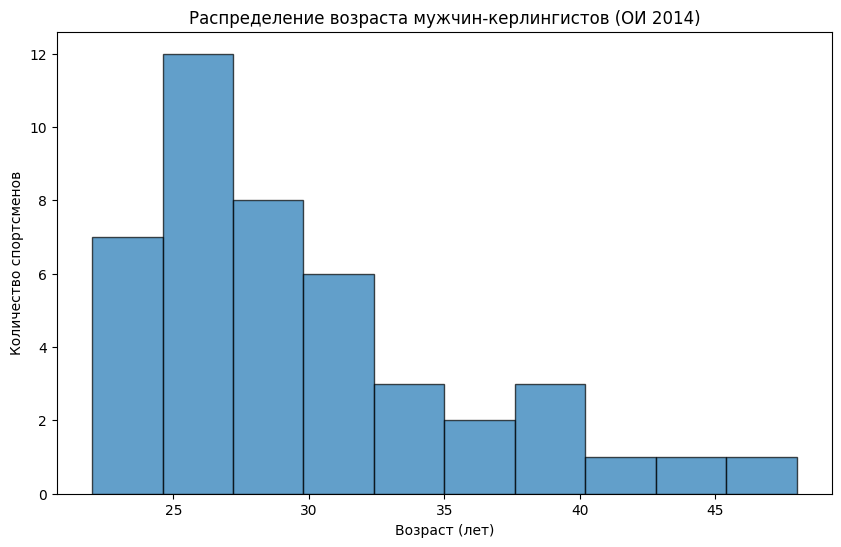

In [ ]:
curling_men_2014 = df[
    (df['Sport'] == 'Curling') &
    (df['Sex'] == 'M') &
    (df['Year'] == 2014) &
    (df['Age'].notna())
]

plt.figure(figsize=(10, 6))
plt.hist(curling_men_2014['Age'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Распределение возраста мужчин-керлингистов (ОИ 2014)')
plt.xlabel('Возраст (лет)')
plt.ylabel('Количество спортсменов')

Рассмотрим зимнюю олимпиаду 2006 года. Сгруппируйте данные
по стране (используйте признак «NOC») и посчитайте для каждой
страны количество завоеванных медалей и средний возраст
спортсменов. Выведите только те страны, которые завоевали хотя
бы одну медаль.

In [ ]:
winter_2006_medals = df[
    (df['Year'] == 2006) &
    (df['Season'] == 'Winter') &
    (df['Medal'].notna())
]

result = winter_2006_medals.groupby('NOC').agg({
    'Medal': 'count',
    'Age': 'mean'
}).round(2)

print(result)


     Medal    Age
NOC              
AUS      2  26.00
AUT     30  27.33
BLR      1  28.00
BUL      1  28.00
CAN     69  27.45
CHN     13  24.46
CRO      3  24.67
CZE     27  29.81
EST      3  30.33
FIN     41  28.20
FRA     15  27.73
GBR      1  24.00
GER     54  28.78
ITA     25  29.36
JPN      1  24.00
KOR     19  19.74
LAT      1  27.00
NED     13  26.54
NOR     23  29.78
POL      2  27.50
RUS     41  28.02
SUI     21  28.33
SVK      1  24.00
SWE     64  27.19
UKR      3  30.67
USA     52  24.52


Продолжим рассматривать зимнюю олимпиаду 2006 года.
Посчитайте, сколько медалей каждого достоинства завоевала
каждая из стран-участниц (страны, не завоевавшие ни одной
медали, можно не выводить). Для этого сгруппируйте данные по
стране и по виду медали. Представьте данные в виде сводной
таблицы (pivot_table). В сводной таблице не должно быть
отсутствующих значений (NaN), замените их на 0

In [ ]:
medal_table = winter_2006_medals.pivot_table(
    index='NOC',
    columns='Medal',
    values='ID',
    aggfunc='count',
    fill_value=0
)

print(medal_table)

Medal  Bronze  Gold  Silver
NOC                        
AUS         1     1       0
AUT         7    16       7
BLR         0     0       1
BUL         0     0       1
CAN        11    30      28
CHN         6     2       5
CRO         0     1       2
CZE        24     1       2
EST         0     3       0
FIN         7     0      34
FRA        10     3       2
GBR         0     0       1
GER         6    23      25
ITA        14    11       0
JPN         0     1       0
KOR         2    14       3
LAT         1     0       0
NED         8     3       2
NOR        12     2       9
POL         1     0       1
RUS        13    16      12
SUI         9     5       7
SVK         0     0       1
SWE         8    35      21
UKR         3     0       0
USA        32     9      11
